In [1]:
# importa, seta configuracao, le arquivo e tira colunas 'unnamed'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [52]:
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
dfc = pd.read_csv("aluno_quant_Materias_cotistas.csv", index_col=0)
dfn = pd.read_csv("aluno_quant_Materias_nao_cotistas.csv", index_col=0)

In [4]:
undropableCol = ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola","Ingresso_unb"]
dropVal = 1
dropValAll = 30
dfc.drop([col for col, val in dfc.sum().iteritems() if val < dropValAll and col not in undropableCol], axis=1, inplace=True)
dfn.drop([col for col, val in dfn.sum().iteritems() if val < dropValAll and col not in undropableCol], axis=1, inplace=True)


In [9]:
disciplinas = list(dfc.columns[7:]) #- ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]
sc = pd.Series(index = disciplinas, dtype=float)
# disciplinas
dfc = dfc[dfc["Ingresso_unb"] > 20131]
a = dfc.sum()
for d in disciplinas:
#     print (type(d))
    b  = dfc[dfc[str(d)]>0].count()
    sc[d] = a[str(d)]/b[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [12]:
disciplinas = list(dfn.columns[7:]) #- ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]
sn = pd.Series(index = disciplinas, dtype=float)
# disciplinas
dfn = dfn[dfn["Ingresso_unb"] > 20131]
a = dfn.sum()
for d in disciplinas:
#     print (type(d))
    b  = dfn[dfn[str(d)]>0].count()
    sn[d] = a[str(d)]/b[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


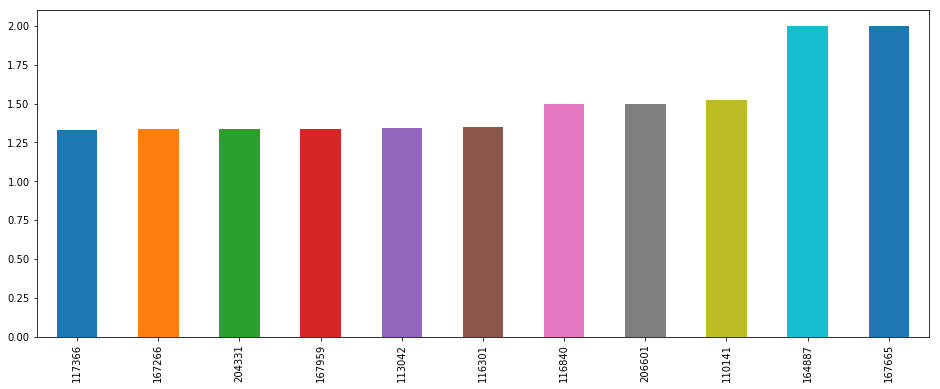

In [13]:
sn[sn>1.3].sort_values().plot.bar(figsize=(16, 6))

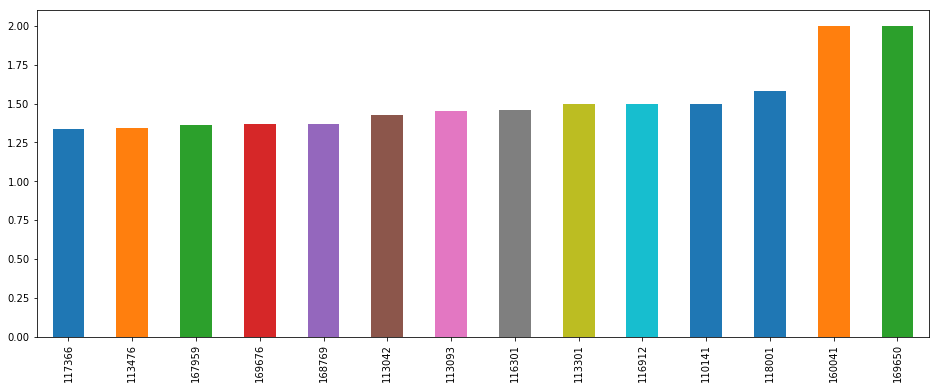

In [11]:
sc[sc>1.3].sort_values().plot.bar(figsize=(16, 6))

In [17]:
##############################################      evasão        ##################################################
####################################################################################################################
dfEvavao = pd.read_csv('dados_filtrados_v4.csv')
dfEvasao_cotista = dfEvavao[dfEvavao['Cotista'] == 1]
dfEvasao_nao_cotista = dfEvavao[dfEvavao['Cotista'] == 0]

In [43]:
def displayEvasao(df):
    alunos = df["ID Aluno"].unique()
    semestres = df['semestre'].unique()
    semestres.sort()
    c = np.zeros((len(semestres), 3))
    for i, semestre in enumerate(semestres):
        c[i] = np.array([semestre, 0, 0])
    for aluno in alunos:
        b = df[df["ID Aluno"]==aluno]
        semesterList = b["semestre"].unique()
        for semester in semesterList:
            c[np.argwhere(c[:,0] == semester), 2] +=1
        a = b.iloc[0]
        if a["saiu"] == 1:
            d = b["semestre"].max()        
            c[np.argwhere(c[:,0] == d), 1] +=1
    dataFrame = pd.DataFrame(data={'total': c[:,2], 'desistiu': c[:,1], 'semestre': c[:,0]})
    return dataFrame

In [55]:
frameNaoCotista = displayEvasao(dfEvasao_nao_cotista)
frameCotista = displayEvasao(dfEvasao_cotista)

In [54]:
result = frameNaoCotista['desistiu'] / frameNaoCotista['total']
dataCotista = [
    go.Bar(
        x = frameNaoCotista['semestre'],
        y = result
    )
]
iplot(dataCotista)